# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [475]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources\city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [476]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [477]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"].reset_index()


In [478]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"].reset_index()



In [479]:
total_ride_driver = pd.merge(ride_count, driver_count, how="left", on=["type", "type"])

In [480]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"].reset_index()


In [481]:
pyber_summary_df = pd.merge(total_ride_driver, total_fare, how="left", on=["type", "type"])

In [482]:
pyber_summary_df

,type,ride_id,driver_count,fare
0,Rural,125,78,4327.93
1,Suburban,625,490,19356.33
2,Urban,1625,2405,39854.38


In [483]:
#  4. Get the average fare per ride for each city type. 
pyber_summary_df['fare'] = pd.to_numeric(pyber_summary_df['fare'])
pyber_summary_df['ride_id'] = pd.to_numeric(pyber_summary_df['ride_id'])
pyber_summary_df['fare_per_ride_avg'] = pyber_summary_df['fare'] / pyber_summary_df['ride_id']

In [484]:
pyber_summary_df.head()

,type,ride_id,driver_count,fare,fare_per_ride_avg
0,Rural,125,78,4327.93,34.623440
1,Suburban,625,490,19356.33,30.970128
2,Urban,1625,2405,39854.38,24.525772


In [485]:
# 5. Get the average fare per driver for each city type. 
pyber_summary_df['driver_count'] = pd.to_numeric(pyber_summary_df['driver_count'])
pyber_summary_df['fare_per_driver_avg'] = pyber_summary_df['fare'] / pyber_summary_df['driver_count']
pyber_summary_df.head()

,type,ride_id,driver_count,fare,fare_per_ride_avg,fare_per_driver_avg
0,Rural,125,78,4327.93,34.623440,55.486282
1,Suburban,625,490,19356.33,30.970128,39.502714
2,Urban,1625,2405,39854.38,24.525772,16.571468


In [486]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pyber_summary_df.set_index(['type'])

In [487]:
pyber_summary_df.head()

,ride_id,driver_count,fare,fare_per_ride_avg,fare_per_driver_avg
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [488]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None


In [489]:
pyber_summary_df

,ride_id,driver_count,fare,fare_per_ride_avg,fare_per_driver_avg
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [490]:
#  8. Format the columns.
pyber_summary_df["fare"] = pyber_summary_df["fare"].map("${:,.2f}".format)
pyber_summary_df["fare_per_ride_avg"] = pyber_summary_df["fare_per_ride_avg"].map("${:,.2f}".format)
pyber_summary_df["fare_per_driver_avg"] = pyber_summary_df["fare_per_driver_avg"].map("${:,.2f}".format)
pyber_summary_df.rename(columns={"ride_id": "Total Rides", "driver_count": "Total Drivers", "fare": "Total Fares", "fare_per_ride_avg": "Average Fare per Ride", "fare_per_driver_avg": "Average Fare per Driver"})


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [621]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [622]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
type_date = pyber_data_df.groupby(["type", "date"]).sum()[['fare']]
#  for each date where the indices are the city type and date.


In [623]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_date = type_date.reset_index()
type_date.dtypes

type     object
date     object
fare    float64
dtype: object

In [624]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date.pivot(index = 'date', columns = 'type', values = 'fare')

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [625]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range = type_date.loc[(type_date['date'] > '2019-01-01') & (type_date['date'] <= '2019-04-29')]
date_range

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2254,Urban,2019-04-28 10:54:14,10.07
2255,Urban,2019-04-28 12:48:34,33.35
2256,Urban,2019-04-28 14:28:36,11.46
2257,Urban,2019-04-28 16:29:16,36.42


In [626]:
date_ranges = date_range.pivot(index = 'date', columns = 'type', values = 'fare')
date_ranges.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [627]:
date_ranges.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [628]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
date_ranges.index = pd.to_datetime(date_ranges.index, errors='coerce')
#date_range.index = pd.to_datetime(date_range.index, errors='coerce')

In [629]:
# 7. Check that the datatype for the index is datetime using df.info()
date_ranges.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [630]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

date_range_week = date_ranges.resample("W").sum()
date_range_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


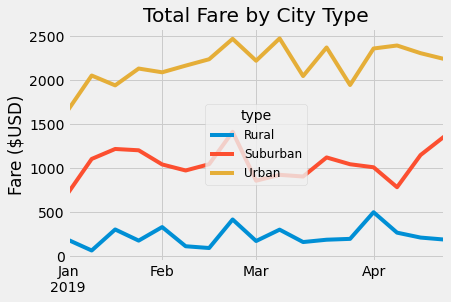

In [639]:
# 8. Using the, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

date_range_week.plot(kind = 'line', title = "Total Fare by City Type", legend=True, xlabel = "", ylabel = "Fare ($USD)")
lgnd = plt.legend(fontsize="12", loc="center", title="type")
plt.savefig("../analysis/PyBer_fare_summary.png")